In the following analysis we used the public dataset:

Pollen, Alex A., et al. "Molecular identity of human outer radial glia during cortical development." Cell 163.1 (2015): 55-67.
http://dx.doi.org/10.1016/j.cell.2015.09.004

Processed data was downloaded from supplementary infromation, tables S1 and S2 (files mmc2.xls and mmc3.xls respectively).

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('white')
sns.set_context('notebook', font_scale=1.7, rc={'lines.linewidth': 1.3})

# plot 2D PCA representation of the data
def dimensional_reduction(D, pc=[0,1], c=None, clabel=None, cbar=True, clim=None, xticks=[], yticks=[], 
                          cmap='YlGnBu', fs=[8,5], ms=200, marker=None, label=None, ax=None):
    if ax==None:
        f = plt.subplots(1, 1, figsize=(fs[0], fs[1]), sharex=True, sharey=True)
    X = PCA(n_components=3).fit(D.T).transform(D.T)

    im = plt.scatter(X[:,pc[0]], X[:,pc[1]], c=c, cmap=cmap, marker='o', s=ms, alpha=0.9)
    if label!=None:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    if cbar:
        cbar = plt.colorbar(im, orientation='vertical')
        if clabel!=None:
            if clim!=None:
                plt.clim([clim[0], clim[1]])
            else:
                plt.clim([np.min(c), np.max(c)])
            cbar.set_label(clabel)
    if xticks!=None:
        plt.xticks(xticks)
    if yticks!=None:
        plt.yticks(yticks)
        
# calculate the expression of a list of genes defined in list_genes in the log2(X+1) scale        
def get_expression(D, list_genes):
    D = 2**D - 1.0
    out = np.sum( [D.loc[list_genes[i]].values for i in range(len(list_genes))], axis=0)
    return np.log2(np.array(out) + 1.0) 

In [2]:
D = {}
D['info']  = pd.read_excel('./mmc2.xlsx', index_col=None, header=0)
D['data']  = pd.read_excel('./mmc3.xlsx', index_col=0,    header=0)
D['info'].index = D['info']['Cell'].values
D['info'] = D['info'].T
D['class'] = pd.DataFrame([i[0] for i in D['data'].columns], index=D['data'].columns, columns=['__class']).T
D['data'].head()

,O9-A6,O9-B5,O9-B8,O9-D2,O9-E2,O9-F4,O9-F5,O9-G9,O10-A4,O10-D1,...,O9-G12,O10-G4,O8-H1,S37-B4,S37-F12,S38-H11,Hi_GW16_10,Hi_GW16_26,Hi_GW16_7,Hi_GW16_9
DDX11L1,0,0,0,0,0,0,0,0,0.00000,0,...,0,0,0,0,0,0,0.000000,0,0,0
WASH7P,0,0,0,0,0,0,0,0,1.09624,0,...,0,0,0,0,0,0,0.620579,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0,0.00000,0,...,0,0,0,0,0,0,0.000000,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0.00000,0,...,0,0,0,0,0,0,0.000000,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0.00000,0,...,0,0,0,0,0,0,0.000000,0,0,0


In [3]:
D['info'].head()

,O10-A1,O10-A11,O10-A12,O10-A3,O10-A4,O10-A5,O10-A7,O10-A8,O10-A9,O10-B1,...,Hi_GW16_24,Hi_GW16_25,Hi_GW16_26,Hi_GW16_3,Hi_GW16_4,Hi_GW16_5,Hi_GW16_6,Hi_GW16_7,Hi_GW16_8,Hi_GW16_9
Cell,O10-A1,O10-A11,O10-A12,O10-A3,O10-A4,O10-A5,O10-A7,O10-A8,O10-A9,O10-B1,...,Hi_GW16_24,Hi_GW16_25,Hi_GW16_26,Hi_GW16_3,Hi_GW16_4,Hi_GW16_5,Hi_GW16_6,Hi_GW16_7,Hi_GW16_8,Hi_GW16_9
Anatomical Source,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,...,VZ,VZ,VZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ,SVZ
Age,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,GW16.5,...,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16,GW16
"LibrarySize (Read Pairs, Million)",2.106004,2.814935,2.978565,2.074493,1.916913,2.430956,2.856777,2.955401,2.491033,2.356684,...,7.153688,8.033162,10.42565,10.16841,8.517629,10.35865,6.190761,7.338047,7.935952,9.562204
MappedPairs,0.854531,1.32159,1.35072,0.554413,0.94399,0.831268,1.019634,1.102537,0.945783,1.338143,...,2.572362,2.036062,2.038351,5.4746,1.947274,2.494832,1.307926,1.328574,3.597052,1.577758


Using cells only from the VZ. Num cells =  179


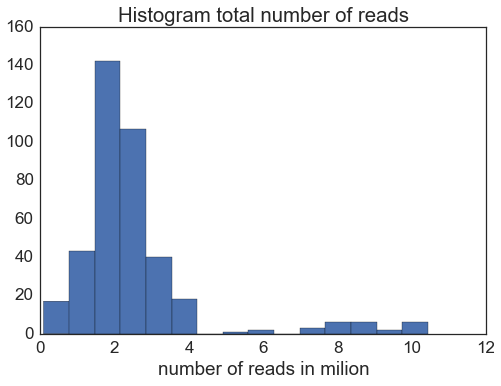

In [4]:
# --------- checking the distribuition of the total number of reads of the cells. --------------
plt.hist(D['info'].loc['LibrarySize (Read Pairs, Million)'], bins=15)
plt.xlabel('number of reads in milion')
plt.title('Histogram total number of reads')

# -- only cells from the Ventricular Zone (VZ) and with more than 1million reads are selected --
t_minreads = D['info'].loc['LibrarySize (Read Pairs, Million)'].values>1
t_vz       = D['info'].loc['Anatomical Source']=='VZ'  
t_svz      = D['info'].loc['Anatomical Source']=='SVZ'
D['VZ']  = D['info'].columns[t_vz  & t_minreads]
D['SVZ'] = D['info'].columns[t_svz & t_minreads]

print 'Using cells only from the VZ. Num cells = ', len(D['info'].loc['Cell'][D['VZ']])
D['data']  = D['data'][D['VZ']]
D['class'] = D['class'][D['VZ']]

# Using log2 scale, and adding 1.0 to avoid -inf
D['data']  = np.log2(D['data']+1.0)

In [5]:
# Biologically relevant lists of genes. 
# The RG and IP markers were selected according to the list suggested in the paper (Pollen et al 2015)

l ={'RG' :  ['SLC1A3','SOX2','PAX6','PDGFD','GLI3']
   ,'IP' :  ['EOMES', 'ELAVL4', 'NEUROG1', 'NEUROD1', 'NEUROD4','PPP1R17','PENK']
   ,'Hes':  ['HES1','HES5']
   ,'IDs':  ['ID1','ID2','ID3','ID4']
   }

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


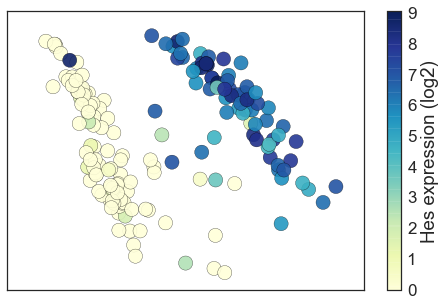

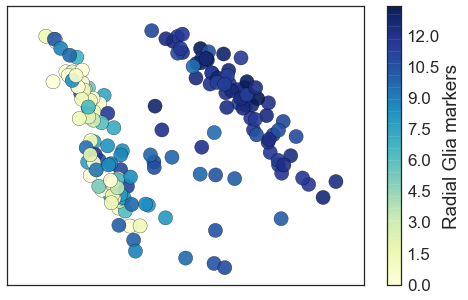

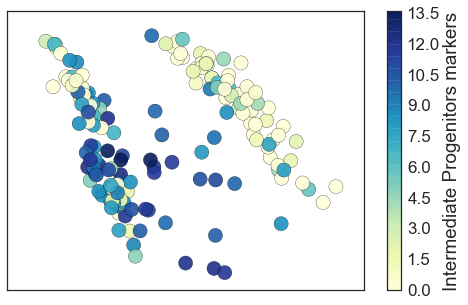

In [6]:
x = get_expression(D['data'], l['Hes'])
dimensional_reduction(D['data'], clabel='Hes expression (log2)', c=x, xticks=[], yticks=[])

x = get_expression(D['data'], l['RG'])
dimensional_reduction(D['data'], clabel='Radial Glia markers', c=x, xticks=[], yticks=[])

x = get_expression(D['data'], l['IP'])
dimensional_reduction(D['data'], clabel='Intermediate Progenitors markers', c=x, xticks=[], yticks=[])

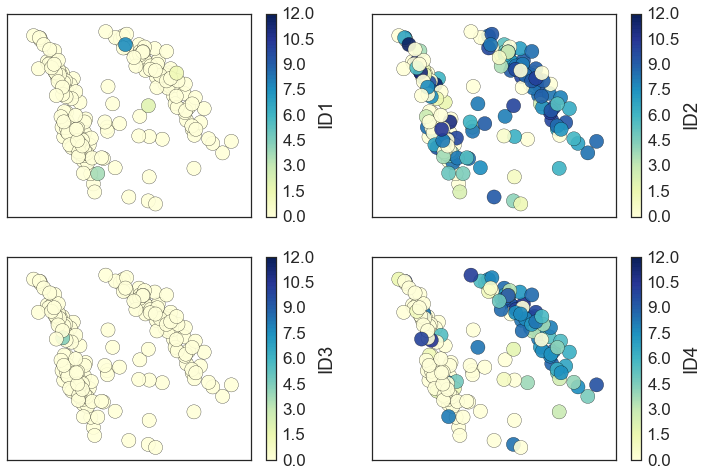

In [7]:
f = plt.subplots(2, 2, figsize=(12, 8))
for i in range(len(l['IDs'])):
    if i<2:
        ax = plt.subplot2grid((2, 2), (0, i), colspan=1, rowspan=1)
    else:
        ax = plt.subplot2grid((2, 2), (1, i-2), colspan=1, rowspan=1)
    x = get_expression(D['data'], [l['IDs'][i]])
    dimensional_reduction(D['data'], clabel=l['IDs'][i], c=x, clim=[0, 12], ax=ax)